In [20]:
import pandas as pd
import numpy as np
from insight_utils import bar_groups_chart, line_plot_column
from constants import FORMAT_MODIFIERS, LENGTH_MODIFIERS, DENSENESS_MODIFIERS, QUALITY_MODIFIERS, STRUCTURE_MODIFIERS

modifiers_path = "results/modifiers/gpt-3.5-turbo-16k/"
baseline_df = pd.read_csv("results/gpt4/baseline.csv")
format_df = pd.read_csv(modifiers_path + "format.csv")
# length_df = pd.read_csv(modifiers_path + "length.csv")
# denseness_df = pd.read_csv(modifiers_path + "denseness.csv")
# structure_df = pd.read_csv(modifiers_path + "structure.csv")
# quality_df = pd.read_csv(modifiers_path + "quality.csv")



#### Format

In [21]:
format_df = format_df.iloc[9:]
format_df.head()

,prompt_template,examples,num_examples,text,title,prompt,prediction,finish_reason,bert_score,rogue_1,...,slor,avg_error_count_score,errors,contradiction_ratio,neutral_contradiction_ratio,number_hallucinations,three_by_three,long_subheadings,long_bullets,config
9,3 subheadings with 3 bullet points,[[]],0,Everyone needs a coach. It doesn't matter whet...,NaN,user:\nSummarize the text.\nText: ###\nEveryon...,The lack of feedback for teachers and its impa...,stop,0.140023,0.306383,...,2.968255,1.0,0,0.0,0.0,0,0,3,8,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
10,3 subheadings with 3 bullet points,[[]],0,Everyone needs a coach. It doesn't matter whet...,NaN,user:\nSummarize the text.\nText: ###\nEveryon...,The Need for Effective Feedback for Teachers\n...,stop,0.176263,0.317460,...,3.157349,1.0,0,0.0,0.0,0,1,3,8,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
11,3 subheadings with 3 bullet points,[[]],0,Everyone needs a coach. It doesn't matter whet...,NaN,user:\nSummarize the text.\nText: ###\nEveryon...,The importance of feedback for teachers\nTeach...,stop,0.148290,0.321608,...,3.131059,1.0,0,0.0,0.0,0,0,1,8,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
12,3 subheadings with 3 bullet points,[[]],0,Everyone needs a coach. It doesn't matter whet...,NaN,user:\nSummarize the text.\nText: ###\nEveryon...,The importance of feedback for improvement\nAl...,stop,0.156052,0.348718,...,3.123916,1.0,0,0.0,0.0,0,1,3,7,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
13,3 subheadings with 3 bullet points,[[]],0,Everyone needs a coach. It doesn't matter whet...,NaN,user:\nSummarize the text.\nText: ###\nEveryon...,The need for teacher feedback and improvement\...,stop,0.196888,0.293839,...,3.109228,1.0,0,0.0,0.0,0,1,3,9,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."


In [22]:
for m in FORMAT_MODIFIERS:
    print(m)

3 subheadings with 3 bullet points
3 subheadings, each with 3 bullet points
Three subheadings, each with three bullet points
3 x 3 subheadings and bullet points
3 by 3 subheadings with bullet points
Three subheadings with three corresponding bullet points
Output must be three subheadings, each with three bullet points
Output format: three subheadings, each with three bullet points


In [23]:
format_df.describe()

,num_examples,title,bert_score,rogue_1,rogue_2,rogue_L,slor,avg_error_count_score,errors,contradiction_ratio,neutral_contradiction_ratio,number_hallucinations,three_by_three,long_subheadings,long_bullets
count,80.0,0.0,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.0,NaN,0.122189,0.332441,0.037867,0.231952,inf,0.998971,0.175000,0.002083,0.016667,0.862500,0.450000,1.900000,6.925000
std,0.0,NaN,0.072241,0.032112,0.014247,0.022380,NaN,0.002390,0.382364,0.013092,0.052033,1.357061,0.500633,0.789167,2.432767
min,0.0,NaN,0.000000,0.252874,0.010101,0.178571,2.735371,0.989011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.0,NaN,0.113008,0.310538,0.029075,0.216602,3.113596,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
50%,0.0,NaN,0.148973,0.332586,0.037737,0.230108,3.162398,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.000000
75%,0.0,NaN,0.173311,0.352484,0.047226,0.245934,3.203066,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,9.000000
max,0.0,NaN,0.211209,0.411111,0.078652,0.288889,inf,1.000000,1.000000,0.083333,0.333333,5.000000,1.000000,3.000000,9.000000


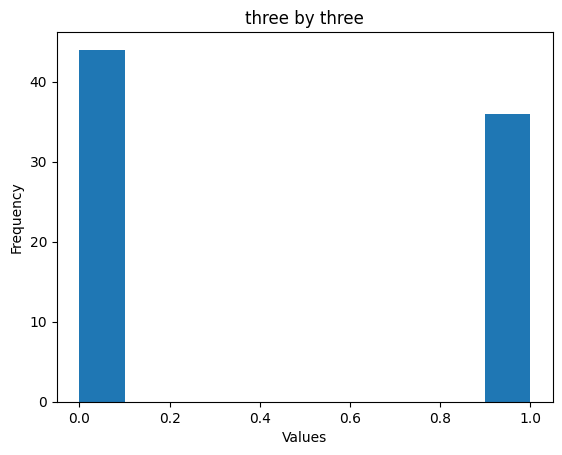

In [24]:
import matplotlib.pyplot as plt

# Create a histogram of a numerical column
plt.hist(format_df["three_by_three"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("three by three")
plt.show()

# # Create a histogram of a numerical column
# plt.hist(format_df["long_subheadings"])
# plt.xlabel("Values")
# plt.ylabel("Frequency")
# plt.title("Long Subheadings")
# plt.show()

# # Create a scatter plot of two numerical columns
# plt.scatter(format_df["rogue_1"], in_context_df["rogue_L"])
# plt.xlabel("rogue_1")
# plt.ylabel("rogue_L")
# plt.title("Scatter Plot")
# plt.show()

In [36]:
dataframes = [format_df.iloc[i:i+10] for i in range(0,len(format_df),10)]


for i, df in enumerate(dataframes):
    print(FORMAT_MODIFIERS[i]) 
    print("\tSuccesses: " + str(df["three_by_three"].sum()) + "/10")

# line_plot_column(dataframes, "three_by_three", FORMAT_MODIFIERS)

3 subheadings with 3 bullet points
	Successes: 5/10
3 subheadings, each with 3 bullet points
	Successes: 7/10
Three subheadings, each with three bullet points
	Successes: 6/10
3 x 3 subheadings and bullet points
	Successes: 0/10
3 by 3 subheadings with bullet points
	Successes: 0/10
Three subheadings with three corresponding bullet points
	Successes: 1/10
Output must be three subheadings, each with three bullet points
	Successes: 8/10
Output format: three subheadings, each with three bullet points
	Successes: 9/10
